![imagen](../../../imagenes/seaborn.png)


# Exploratory Data Analysis with Seaborn

Tras haber visto los fundamentos del EDA y haber realizado un extenso viaje por la librería Matplotlib, vamos a complementar todo esto con la librería Seaborn, una librería de representación cada día más utilizada y que nos permitirá realizar gráficos muy interesantes que nos servirán como complemento de lo ya visto con anterioridad. Además, la idea es poder recorrer este camino con ejemplos de cómo se debería utilizar un gráfico o pequeños tips sobre las situaciones más favorables para utilizar un tipo de gráficos u otro.

Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), ya que, en primer lugar, es imposible abarcarlo todo, y en segundo lugar, porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, lo primero que tendremos que identificar es el tipo de los datos y cuántas variables vamos a representar
- Una varibale numérica
- Una variable categórica
- Dos variables numércias
- Tres o más variables numércias
- Dos variablees categóricas
- Variables numéricas y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas como es [este](https://www.data-to-viz.com/), lo tendremos mucho más fácil.



In [23]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Aumentamos el número de filas de los DataFrames de Pandas en el Notebook
sns.set(color_codes=True) # Editamos el tema de la librería de Seaborn

# Filtramos todos aquellos mensajes de advertencia que no sean realmente un problema:Zz
import warnings
warnings.filterwarnings("ignore")

Ahora, importaremos diferentes datasets para hacer nuestras representaciones:

In [24]:
# Cargamos las features en un DataFrame:
iris_df = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])
boston_df = pd.DataFrame(load_boston()["data"],columns=load_boston()["feature_names"])

# Y añadimos la columna de especies:
iris_df["target"] = load_iris()["target_names"][load_iris()["target"]]
boston_df["target"] = load_boston()["target"]

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("../../../data/titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("../../../data/supermarket_sales.csv")

# Cargamos dataset de suicidios
suicid_df = pd.read_csv("../../../data/suicide.csv")

In [25]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

![imagen](../../../imagenes/dtypes.png)

**Variables cualitativas**: son todas aquellas variables que expresan una cualidad, característica o modalidad.
  - **Ordinales**: pueden tomar diferentes valores que podemos ordenar según una escala prestablecida.
  - **Nominales**: son aquellas variables que no pueden ser ordenadas en base a ninguna escala de manera natural.

**Variables cuantitativas**: son todas aquellas variables que podemos contabilizar, es decir, definir con un número, lo que a su misma vez implica que podamos realizar cálculos aritméticos con ella.
  - **Continuas**: son aquellas variables que pueden tomar infinitos valores entre 2 valores dados.
  - **Discretas**: pueden tomar un número finito de valores entre dos dados.



A continuación, vamos a hacer un repaso de las gráficas más utilizadas con ejemplos basados en los datasets que hemos importado anteriormente:

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, dónde se concentran más, si es dispersa, si tiene asimetrías, si tiene outliers, entre otros.

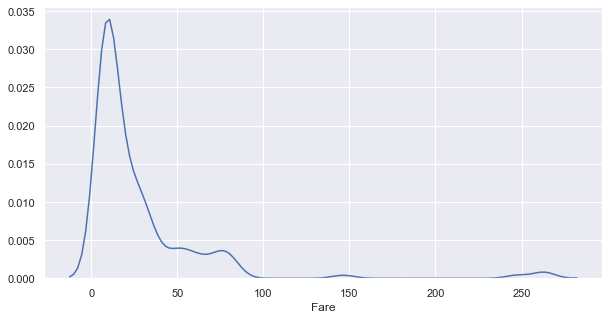

In [53]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'], hist=False);

#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje ``Y`` es un conteo y no la probabilidad de aparición de los valores de la variable.

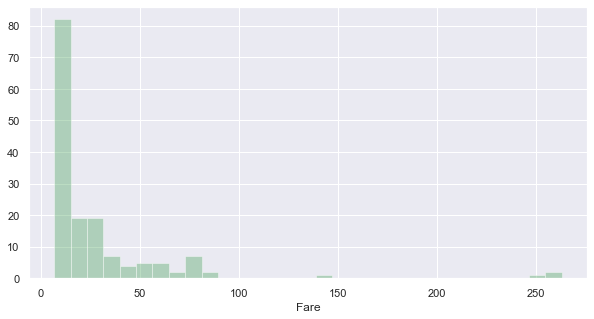

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'],
            kde=False,
            color='g');

Podemos agrupar (visualmente) una variable numérica. Podría ser una posible categorización de los billetes

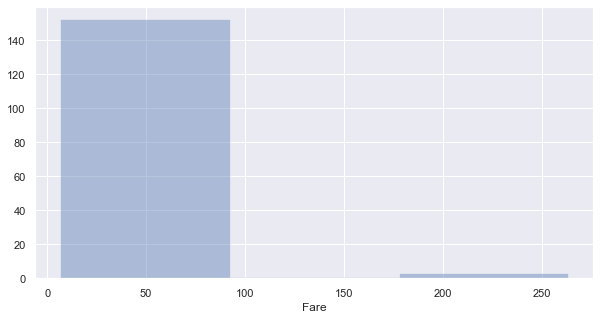

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'],
            kde=False,
            bins=3);

#### Histograma + Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

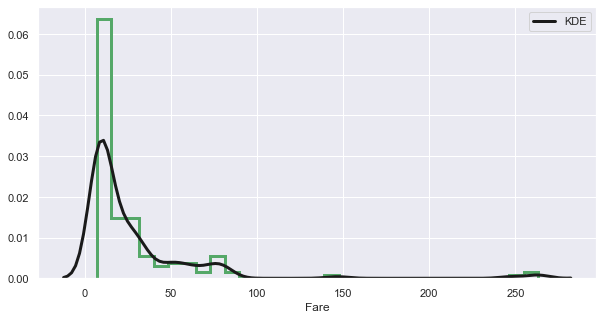

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"});

Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

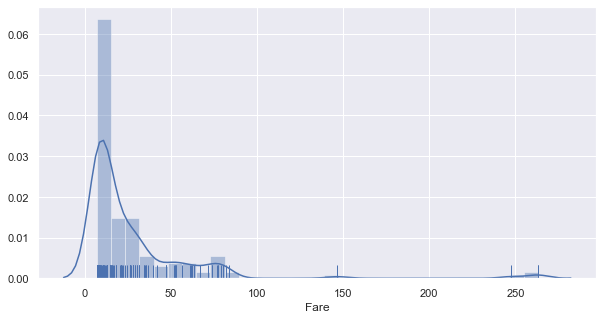

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            rug=True);

#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

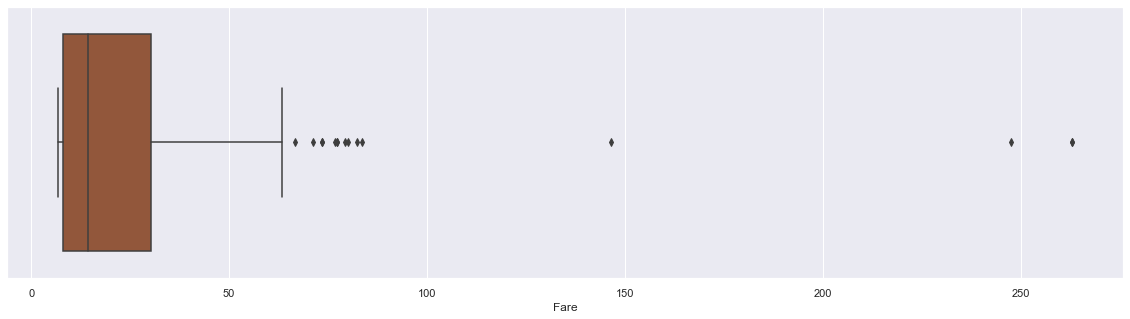

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(titanic_df['Fare'], color='sienna');

![imagen](../../../imagenes/boxplot.png)

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja. No es la función de desnidad como tal sino una estimación de la densidad.

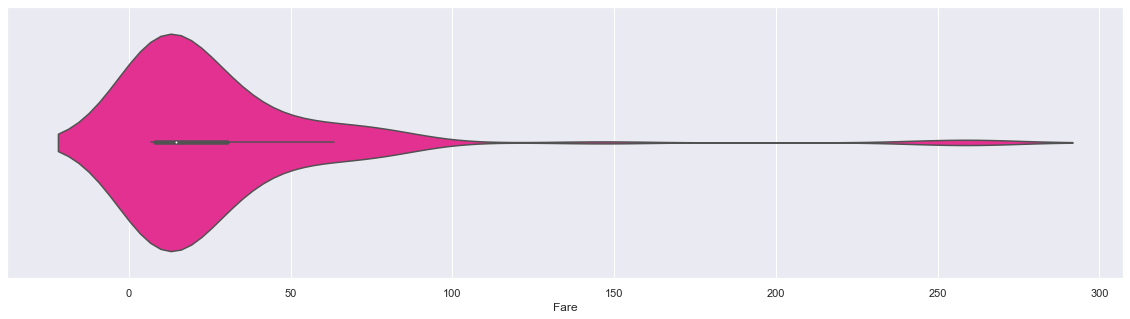

In [40]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df['Fare'], color='deeppink');

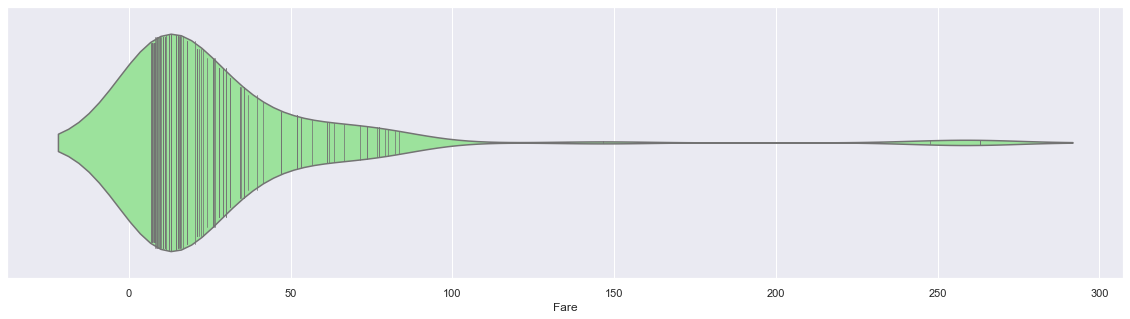

In [41]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df['Fare'],
               color='lightgreen',
              inner='stick');

#### EJERCICIO

1. Repite los 3 tipos de gráficos que acabamos de ver para alguna de las variables del dataframe ``market_df`` en las que tenga sentido usar este tipo de gráficos:

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente en el Titanic.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

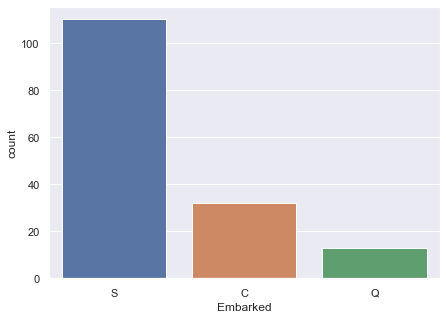

In [91]:
plt.figure(figsize=(7,5))
sns.countplot(titanic_df['Embarked']);

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [92]:
conteo = market_df['Product line'].value_counts(ascending=True)
conteo

Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: Product line, dtype: int64

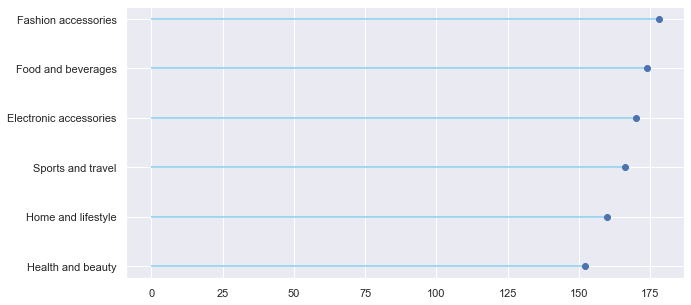

In [93]:
plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=0,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "bo");
# plt.plot(np.zeros(len(conteo)), conteo.index, "bd");


#### Gráficos de tarta y donut

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

Para estos gráficos vamos a volver sobre los tipos de embarque del Titanic.

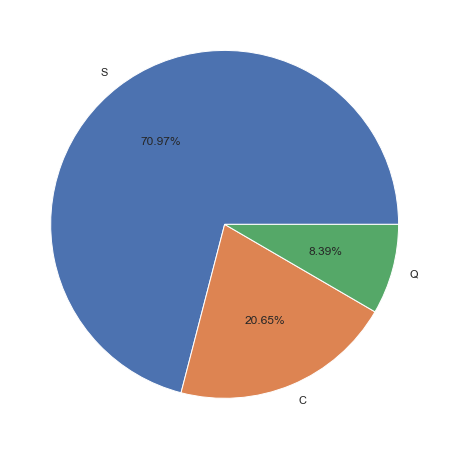

In [100]:
# Gráfico de tarta:
plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
plt.show()

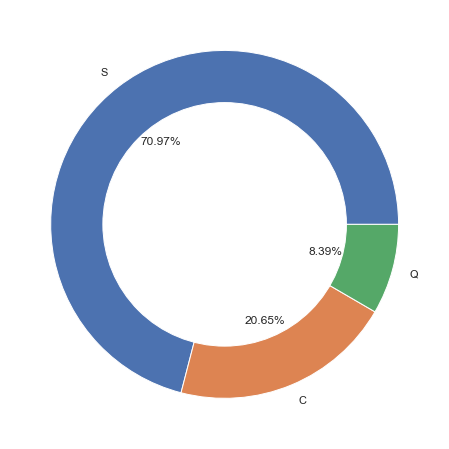

In [109]:
# Cremos un círculo para el centro de la gráfica:
my_circle=plt.Circle( (0,0), 0.7, color='white')

fig = plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
fig.gca().add_artist(my_circle)
plt.show()

In [110]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [125]:
market_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### EJERCICIO

1. Haz un gráfico de estilo lollipop que muestre el conteo de cada una de las formas de pago (Payment) en el dataframe ``market_df``
2. Basándote en ese mismo dataframe, haz una represenación simple del conteo de hombres o mujeres en función del tipo de cliente que son, es decir, tendrás que representar tantas barras como combinaciones posibles existan (que serán 4, 2 por cada columna) 

### EJERCICIO

1. Haz un gráfico de tarta para representar los porcentajes de habitantes en las diferentes ciudades que aparecen en el dataframe ``market_df``. Asumiremos que cada registro del dataframe es un cliente diferente.
2. Complementa el gráfico anterior creando un gráfico de donut donde muestre los porcentajes de cada línea de producto para los habitantes de *Yangon*.

## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas
#### Boxplot (varias variables)

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [166]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


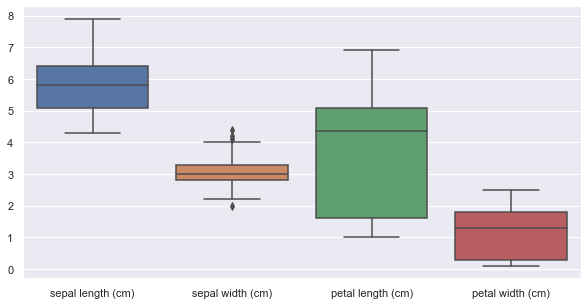

In [167]:
plt.figure(figsize=(10,5))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]]);

El boxplot está bien, pero hay algo de información que se nos escapa

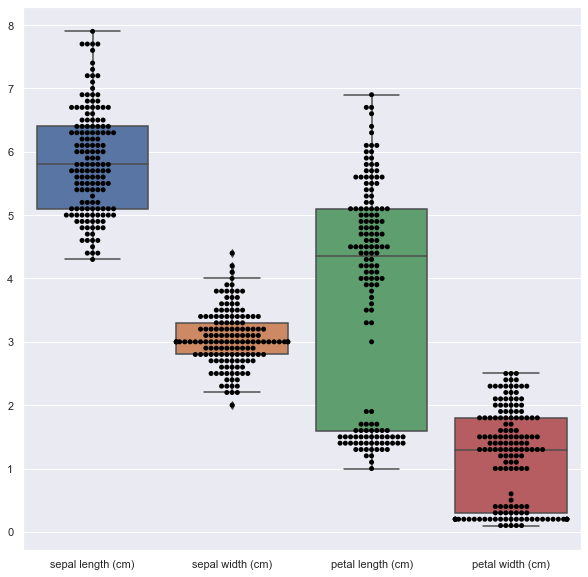

In [168]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])
sns.swarmplot(data=iris_df[iris_df.columns.values[0:4]],
             color="black");

#### Diagramas de densidad (bivariable)

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

In [188]:
iris_df[iris_df.columns.values[2]]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
5      1.7
6      1.4
7      1.5
8      1.4
9      1.5
10     1.5
11     1.6
12     1.4
13     1.1
14     1.2
15     1.5
16     1.3
17     1.4
18     1.7
19     1.5
20     1.7
21     1.5
22     1.0
23     1.7
24     1.9
25     1.6
26     1.6
27     1.5
28     1.4
29     1.6
30     1.6
31     1.5
32     1.5
33     1.4
34     1.5
35     1.2
36     1.3
37     1.4
38     1.3
39     1.5
40     1.3
41     1.3
42     1.3
43     1.6
44     1.9
45     1.4
46     1.6
47     1.4
48     1.5
49     1.4
50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4

Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')

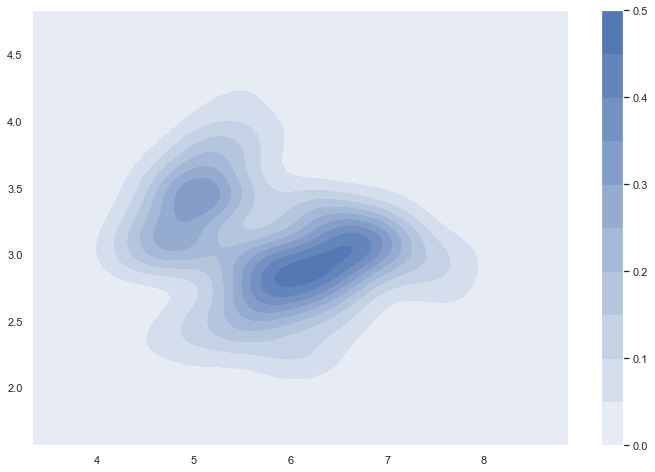

In [178]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=iris_df[iris_df.columns.values[0:2]],
           shade=True, cbar=True);
iris_df.columns[:2]

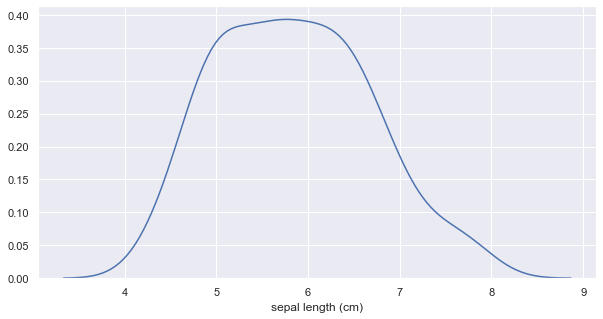

In [196]:
plt.figure(figsize=(10,5))
sns.distplot(iris_df[iris_df.columns.values[0]], hist=False);
# sns.distplot(iris_df[iris_df.columns.values[1]], hist=False);

#### Histogramas y comparativas de funciones de densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

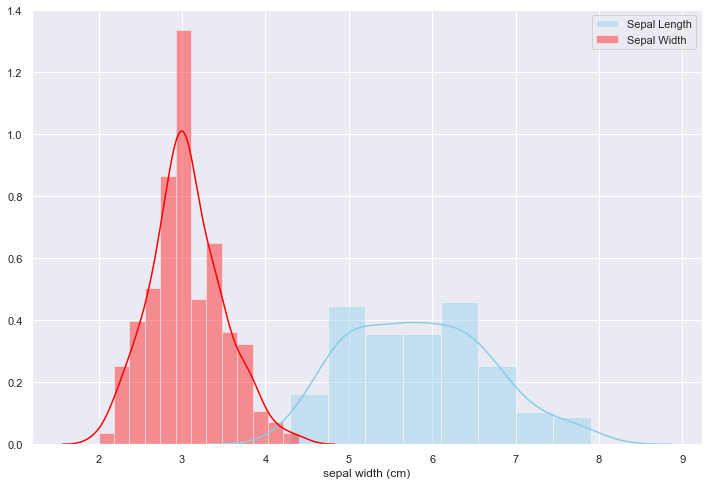

In [204]:
plt.figure(figsize=(12,8))
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", label="Sepal Length")
sns.distplot(iris_df["sepal width (cm)"] , color="red", label="Sepal Width")
plt.legend();

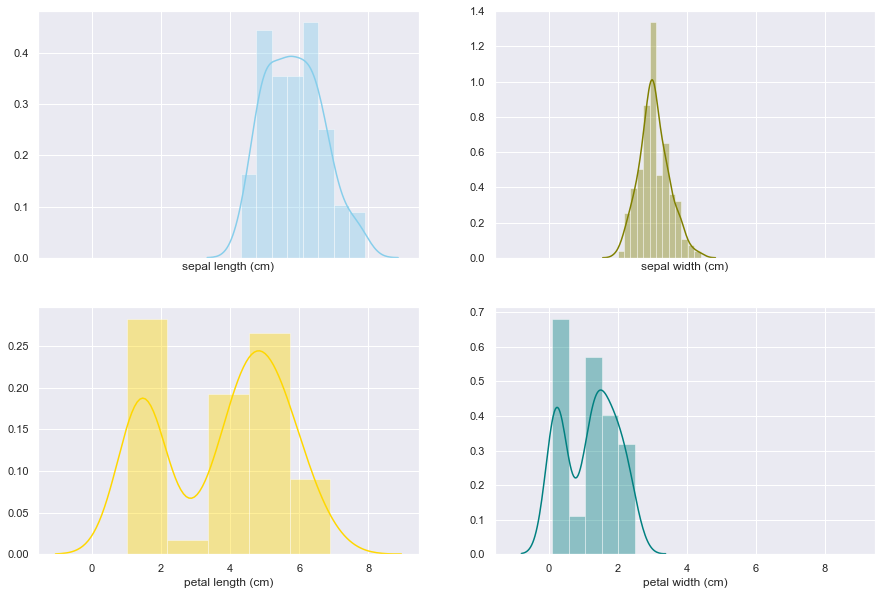

In [202]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.distplot(iris_df["sepal length (cm)"] , color="skyblue", ax=axes[0, 0])
sns.distplot(iris_df["sepal width (cm)"] , color="olive", ax=axes[0, 1])
sns.distplot(iris_df["petal length (cm)"] , color="gold", ax=axes[1, 0])
sns.distplot(iris_df["petal width (cm)"] , color="teal", ax=axes[1, 1]);

### EJERCICIO

1. Representa, tomando como referencia el dataset ``market_df``, los histogramas de las variables ``'Unit price', 'gross income' y 'Rating'`` en una misma gráfica.


##### EXTRA

2. Representa las funciones de densidad de las variables anteriores en 3 gráficas, que se distribuirán 2 arriba (ocupando el mismo tamaño) y una abajo (ocupando el ancho de las 2 de arriba). Además, las gráficas de arriba deberán compartir el eje y. Para hacer esto, puedes recurrir al apartado ``plt.GridSpec:-Complicando-aún-más-las-visualizaciones`` del notebook [13_Subplots](../01_Matplotlib/13_Subplots.ipynb#plt.GridSpec:-Complicando-aún-más-las-visualizaciones) de la carpeta de Matplotlib, donde se usa el grid para seleccionar ejes de tamaños variables (mira el ejemplo de ese apartado).

  Una vez tengas los ejes, podrás usarlos como parámetro de la función, al igual que vimos con las univariantes.

#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

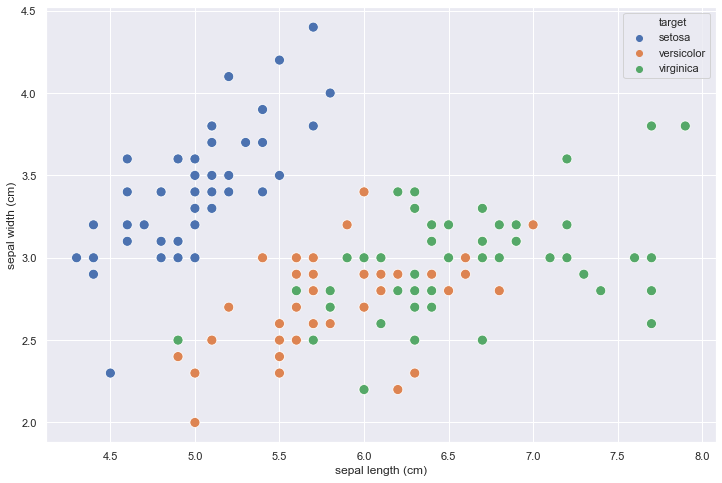

In [293]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = iris_df["sepal length (cm)"],
               y = iris_df["sepal width (cm)"],
               s=100,
               hue=iris_df['target']);

#### Jointplot

Vamos a trabajar ahora sobre el dataframe de Boston:

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

Y lo haremos con el gráfico ``jointplot``, que nos mezcla el análisis univariante con el bivariante:

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

% poblacion con poco poder adquisitivo vs media de habitaciones por vivienda

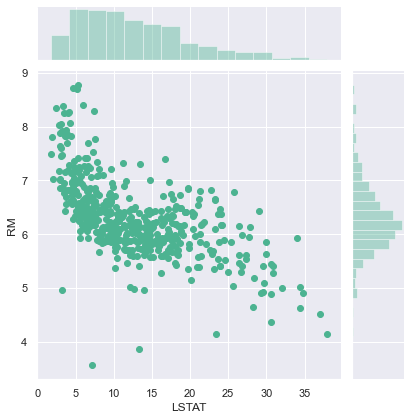

In [282]:
sns.jointplot(x = boston_df['LSTAT'],
             y = boston_df['RM'],
             color='#4CB391');

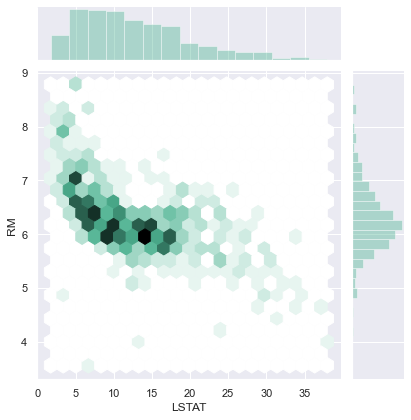

In [283]:
sns.jointplot(x = boston_df['LSTAT'],
             y = boston_df['RM'],
              kind = 'hex',
             color='#4CB391');

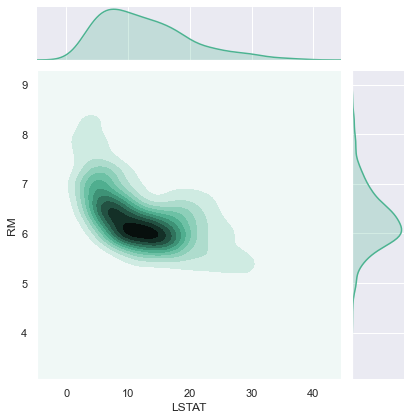

In [290]:
sns.jointplot(x=boston_df['LSTAT'],
              y=boston_df['RM'],
              kind="kde",
              color="#4CB391");

### EJERCICIO

1. Échale un vistazo al dataframe del Titanic, identifica las 2 variables cuantitativas que más sentido tenga analizar, y haz una representación donde aparezca un gráfico de dispersión de ambas, pero en la que también aparezcan sus histogramas de forma individual.

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

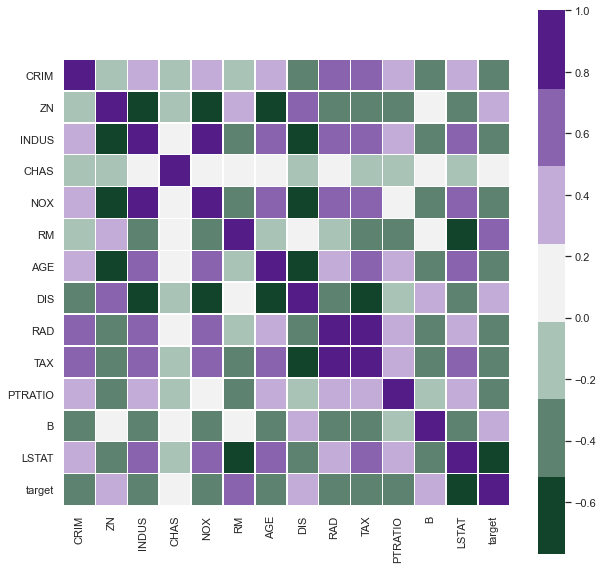

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           linewidths=.5,
           square=True);

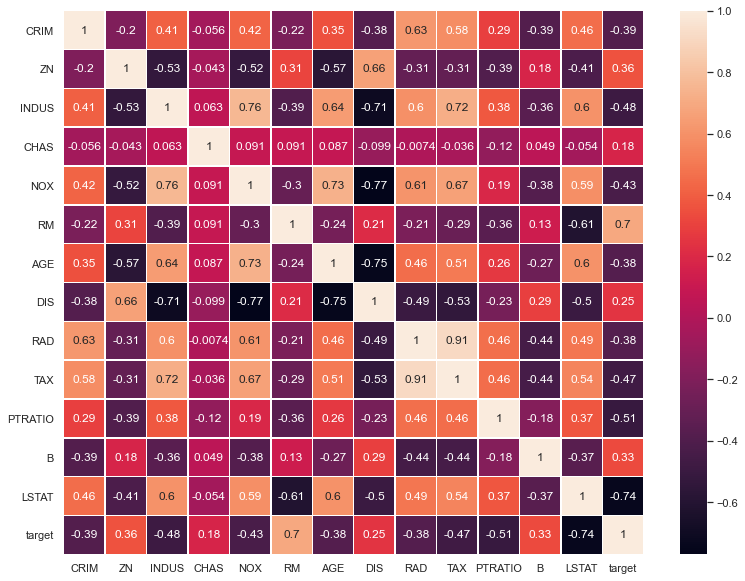

In [36]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(boston_df.corr(),
           annot=True,
           linewidth=.5);

También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

In [49]:
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]
data

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Italy,8571.0,16115.0,39250.0,400.0,43314.0,24410.0
Spain,7559.0,13373.0,30331.0,354.0,29807.0,18778.0
Portugal,1505.0,2590.0,6535.0,85.0,8189.0,5157.0
Belgium,4475.0,8731.0,24300.0,216.0,16887.0,8152.0
Czech Republic,3596.0,5498.0,16885.0,174.0,12042.0,5492.0


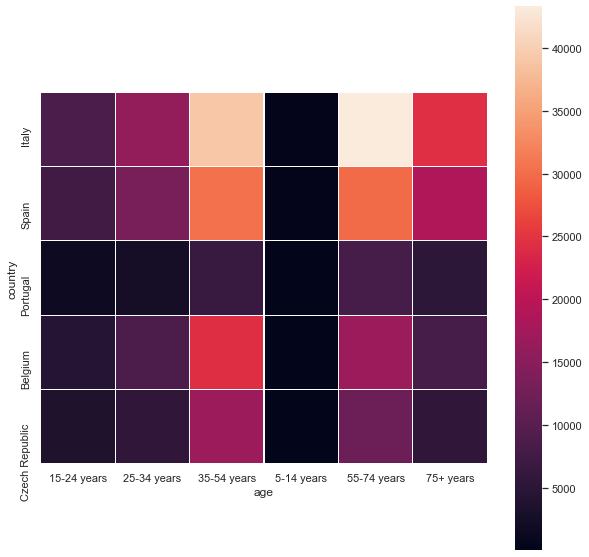

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(data,
            square=True,
            linewidths=.3);

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas varaibles porque no se va a ver bien. Hazlo por partes.

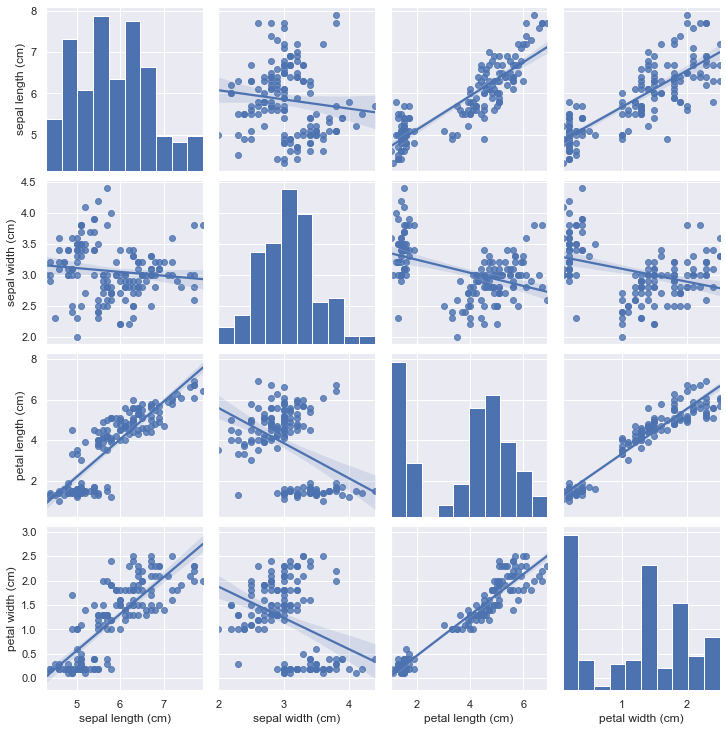

In [39]:
sns.pairplot(iris_df,
            kind='reg')

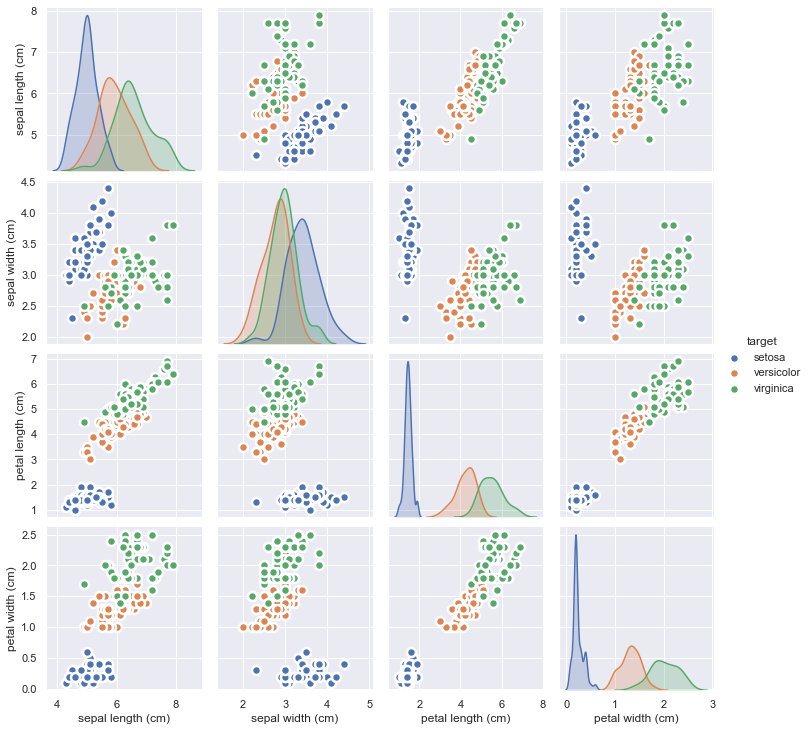

In [40]:
sns.pairplot(iris_df,
            kind='scatter',
            hue='target',
            plot_kws=dict(s=80,
                         edgecolor="white",
                         linewidth=2.5));

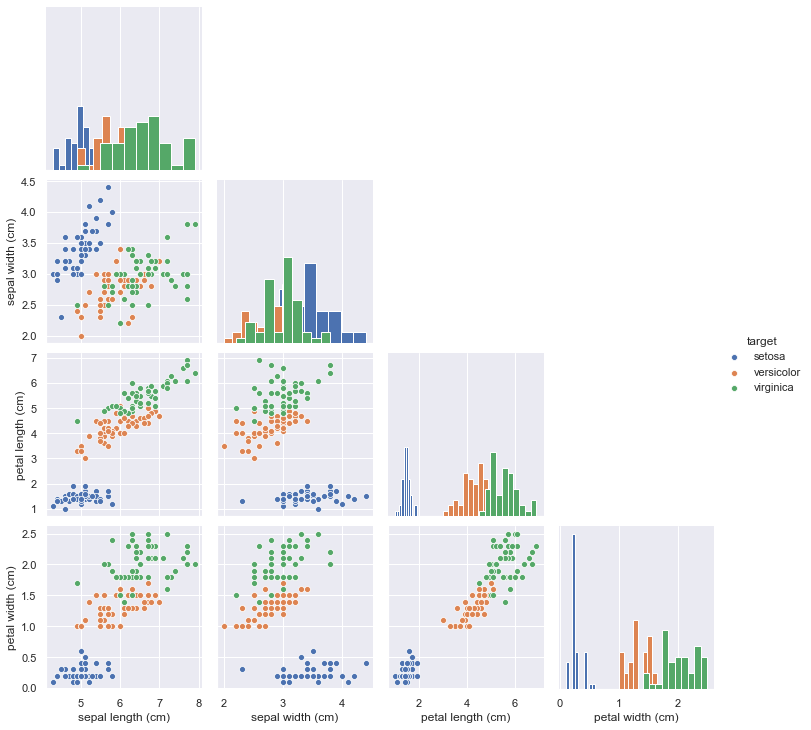

In [41]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="target",
             diag_kind="hist",
             corner = True);

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [42]:
pd.crosstab(titanic_df['Embarked'],
          titanic_df['Sex'],
          margins=True)

Sex,female,male,All
Embarked,,,
C,11,21,32
Q,7,6,13
S,37,73,110
All,55,100,155


#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

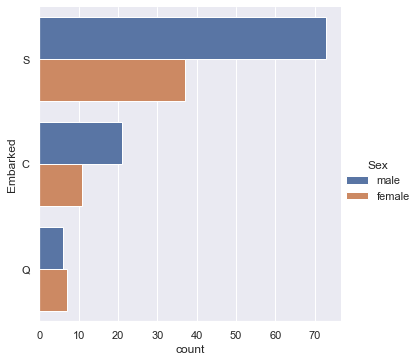

In [43]:
sns.catplot(data=titanic_df,
           y='Embarked',
           hue='Sex',
           kind='count');

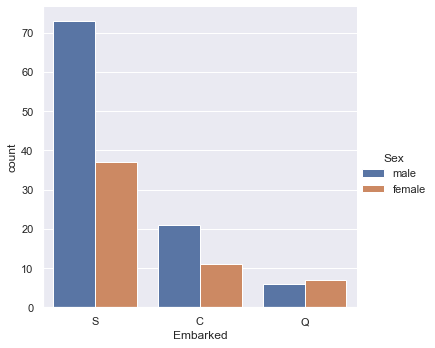

In [44]:
sns.catplot(data=titanic_df,
           x='Embarked',
           hue='Sex',
           kind='count');

Otra manera de visualizar dos o más variables categóricas

<Figure size 2160x720 with 0 Axes>

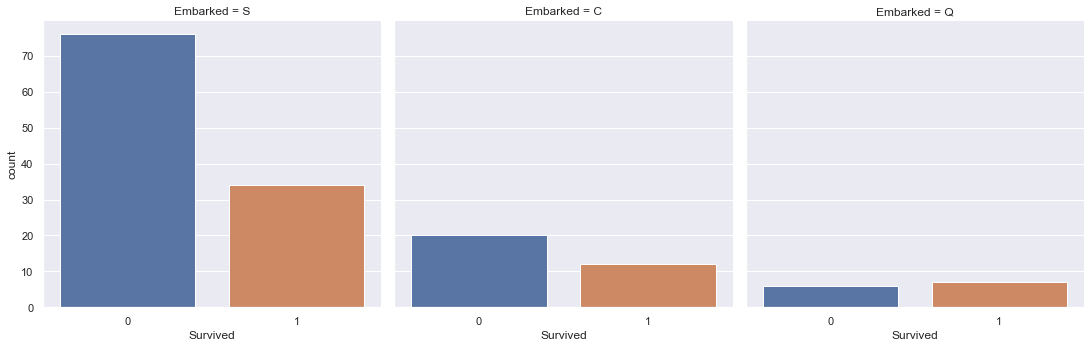

In [45]:
plt.figure(figsize=(30,10));
sns.catplot(x="Survived",
            col="Embarked",
            col_wrap=4,
            data=titanic_df,
            kind="count");

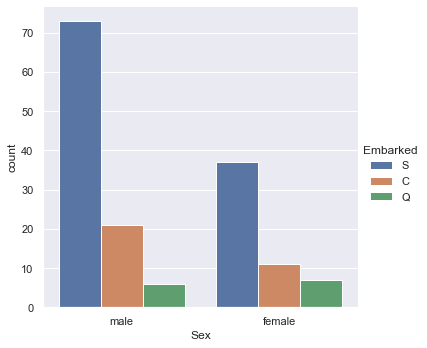

In [46]:
sns.catplot(x="Sex",
            hue='Embarked',
            data=titanic_df,
            kind="count",
           ci=None);

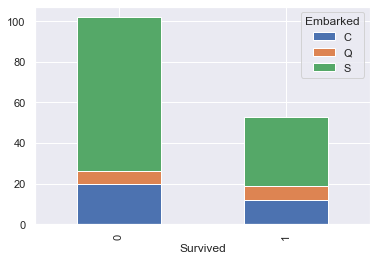

In [47]:
df_plot = titanic_df.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Embarked', index='Survived', values=0)
df_plot.plot(kind='bar', stacked=True);

In [48]:
df_plot

Embarked,C,Q,S
Survived,,,
0,20,6,76
1,12,7,34


### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [91]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]
suicid_df2 = suicid_df2.groupby(['country', 'year']).sum()
suicid_df2.reset_index(inplace=True)

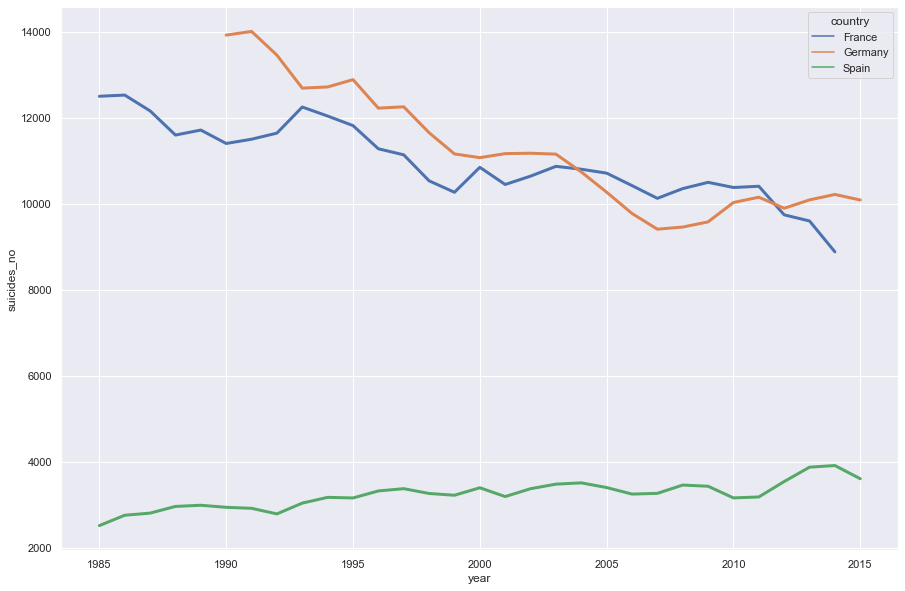

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(data=suicid_df2,
            x="year",
            y="suicides_no",
            hue="country",
            linewidth=3);

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [ ]:
#!pip install squarify

In [98]:
data

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Italy                  132060
Mexico                 111139
Thailand               110643
Canada                 107561
Kazakhstan             101546
Name: suicides_no, dtype: int64

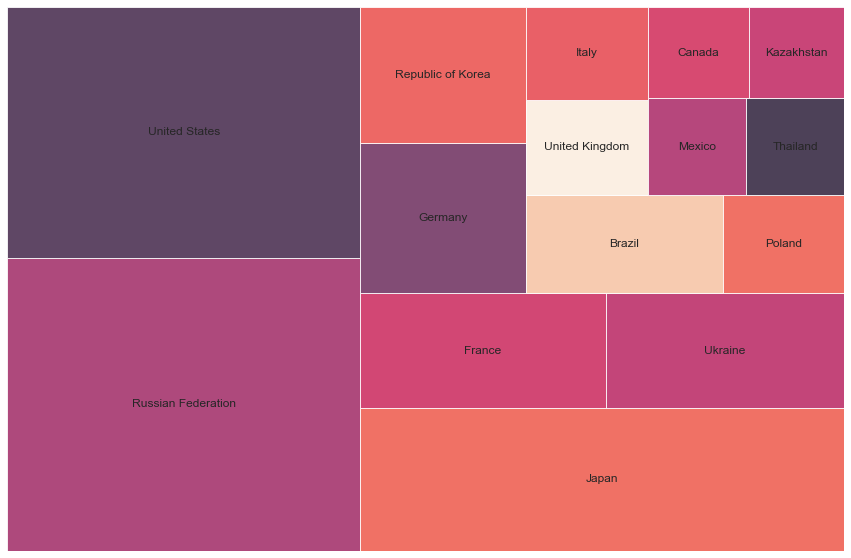

In [97]:
import squarify

data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:15]

plt.figure(figsize=(15,10))
squarify.plot(sizes=data.values,
             label=data.index,
             alpha=.8)
plt.axis('off');

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

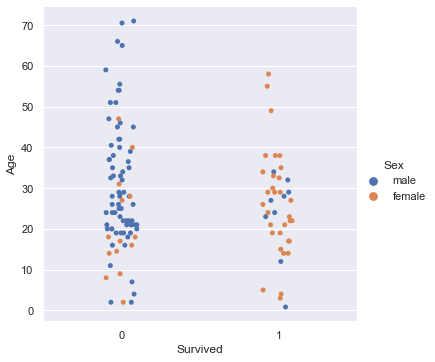

In [99]:
sns.catplot(data=titanic_df,
           x="Survived",
           y='Age',
           hue='Sex')

El equivalente con un diagrama de caja sería el siguiente

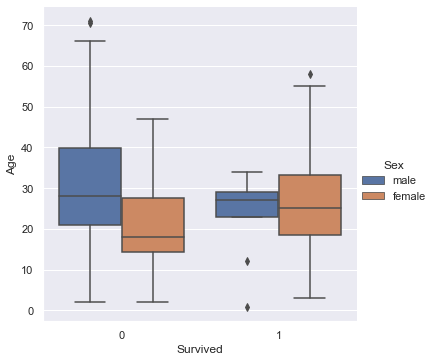

In [100]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

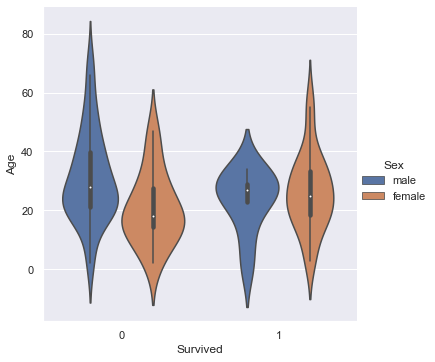

In [101]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

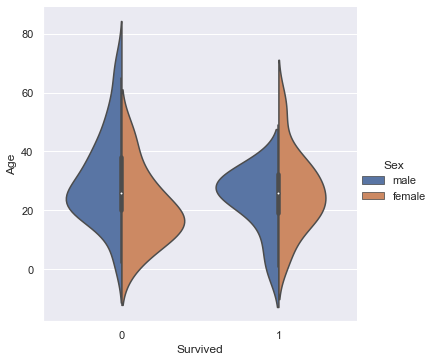

In [102]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split=True, data=titanic_df);

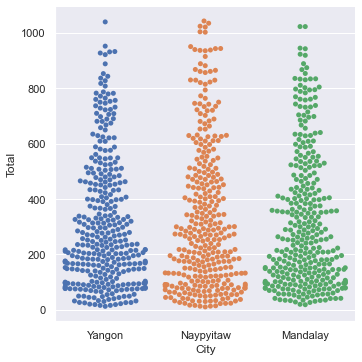

In [103]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df);

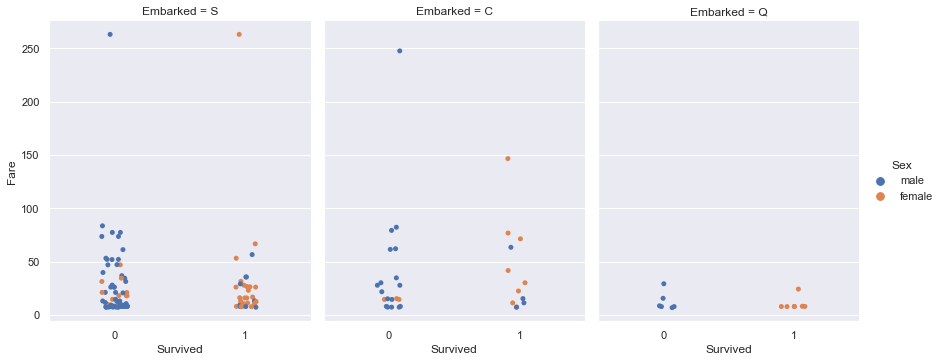

In [104]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

In [105]:
suicid_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

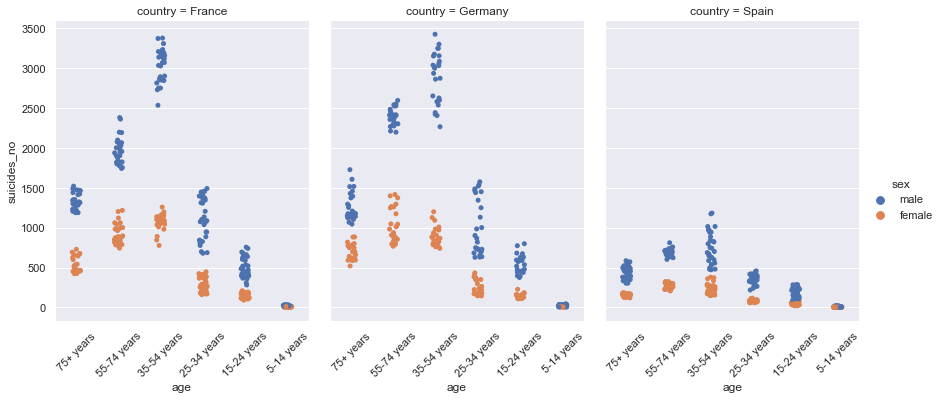

In [109]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]

chart = sns.catplot(x="age",
            y='suicides_no',
            hue="sex",
            col="country",
            data=suicid_df2,
            height=5,
            aspect=.8);
chart.set_xticklabels(rotation=45);

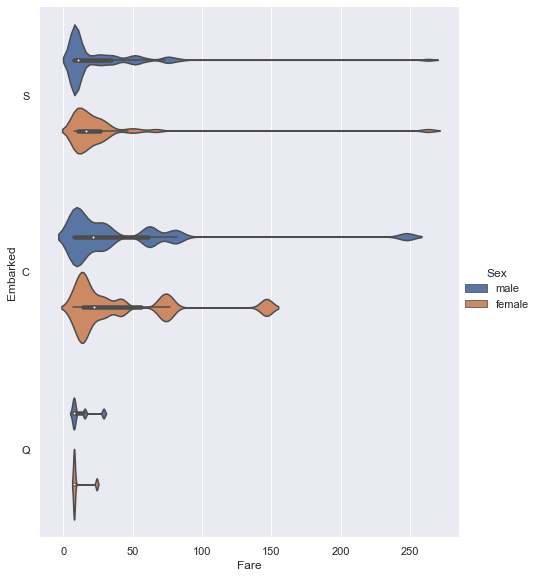

In [110]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            bw=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

In [ ]:
plt.figure(figsize=(10,5))


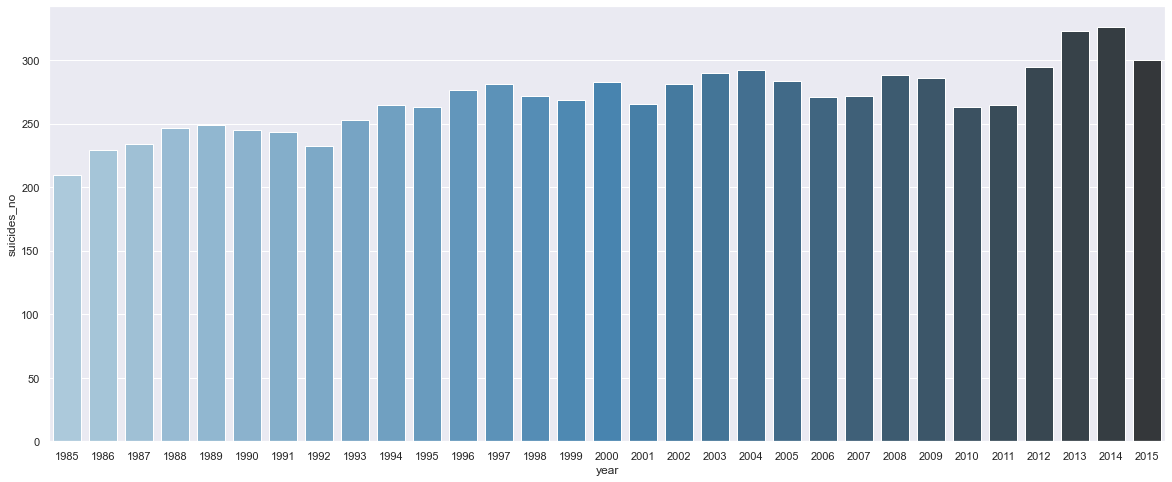

In [111]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(data=suicid_df2,
           x="year",
           y="suicides_no",
           ci=None,
           palette="Blues_d");


In [112]:
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

In [113]:
df_tot

,country,Tot_suicide,Suicide_gdp
0,Russian Federation,1209742,187479
1,United States,1034013,1034013
2,Japan,806902,806902
3,France,329127,329127
4,Germany,291262,291262
5,Republic of Korea,261730,222856
6,Brazil,226613,50690
7,Poland,139098,53853
8,United Kingdom,136805,131700
9,Italy,132060,127301


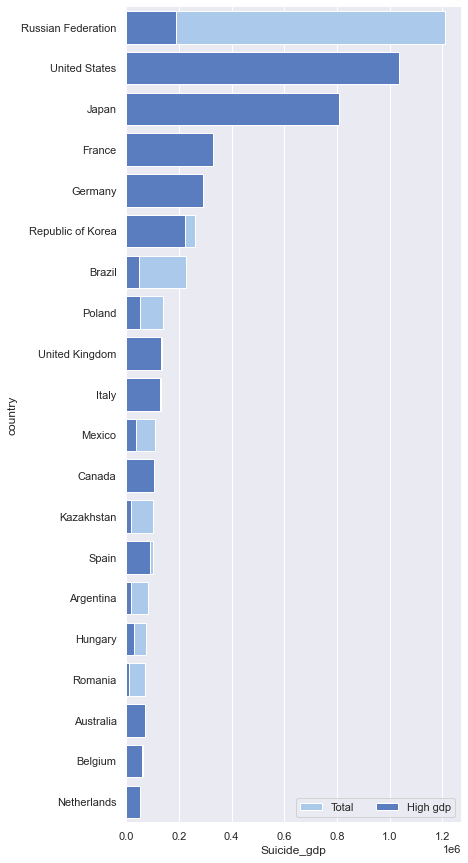

In [114]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

#### Bubble chart

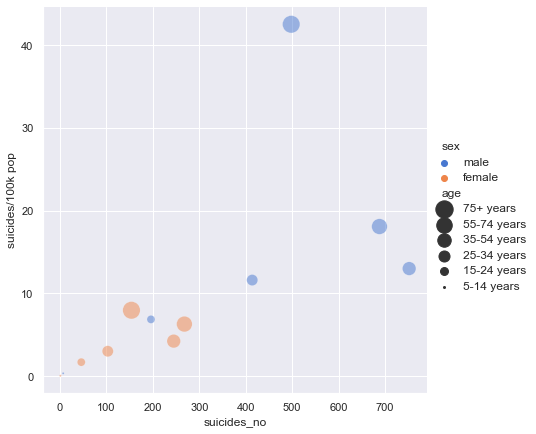

In [115]:
suicid_df2 = suicid_df[suicid_df['country-year'] == 'Spain2002']

sns.relplot(data=suicid_df2,
            x="suicides_no",
            y="suicides/100k pop",
            hue="sex", size="age",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

#### 